<a href="https://colab.research.google.com/github/isys5002-itp/isys5002-2023-semester2/blob/main/10_analysing_and_visualising_superheroes_dataset_Wed4PM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Development Notebook
This notebook is an example of how you could structure your development notebook for your assignment.

- you start with an algorithm/steps/plan
- walk through the steps of your analysis and code development process



**Import libraries and Load the Dataset**

In [1]:
import sqlite3
import pandas as pd

In [2]:
connection = sqlite3.connect('superheroes.db')
cursor = connection.cursor()

Inspect the database schema and find out what tables exist in the "superheroes.db" database, to understand the structure of the database before deciding which specific table(s) to work with or query.

In [3]:
sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cursor.execute(sql)
cursor.fetchall()


[('your_table',), ('superheroes',)]

We will be working on the dataset in the 'superheroes' table.
Load the table into Pandas dataframe

In [4]:
import pandas as pd

sql='''
SELECT * from superheroes;
'''
# Load the data into a DataFrame
sp_df = pd.read_sql_query(sql, connection)


In [ ]:
sp_df

### **Data Exploration:**

Exploring the structure of the dataset.

Use basic Pandas functions to inspect the data:
- Display the first few rows of the dataset using head().
- Use info() to get information about the data types and missing values.
- Use describe() to get summary statistics for numerical columns (if any).

In [7]:
# Display the first few rows of the dataset
sp_df.head(10)

,id,last_name,first_name,superhero,gender,alignment
0,1,Kent,Clark,Superman,Male,Good
1,2,Prince,Diana,Wonder Woman,Female,Good
2,3,Wayne,Bruce,Batman,Male,Good
3,4,Curry,Arthur,Aquaman,Male,Good
4,5,Maximoff,Wanda,Scarlet Witch,Female,Good
5,6,Brolin,Josh,Thanos,Male,Evil
6,7,Napier,Joker,Joker,Male,Evil
7,8,Uxas,Darkseid,Darkseid,Male,Evil
8,9,Parker,Peter,Spider-Man,Male,Good
9,10,Goblin,Green,Green Goblin,Male,Evil


In [8]:
# Get general information about the dataset

sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          25 non-null     int64 
 1   last_name   25 non-null     object
 2   first_name  25 non-null     object
 3   superhero   25 non-null     object
 4   gender      25 non-null     object
 5   alignment   25 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.3+ KB


In [9]:
# Summary statistics of numerical columns
sp_df.describe()

,id
count,25.000000
mean,13.000000
std,7.359801
min,1.000000
25%,7.000000
50%,13.000000
75%,19.000000
max,25.000000


### **Pre-processing and cleaning data**





*For learning purpose we use superheroes_modified.csv file.*

**Check for duplicates**

In [10]:
df = pd.read_csv('/content/superheroes_modified.csv')

In [11]:
df.head() #display the first five rows in the dataset

,id,last_name,first_name,superhero,gender,alignment
0,14,Quinzel,Harley,Harley Quinn,Female,Evil
1,15,Kyle,Selina,Catwoman,Female,Evil
2,16,Darkholme,Mystique,Mystique,Female,NaN
3,18,Ivy,Poison,Poison Ivy,Female,Evil
4,19,Moone,Enchantress,Enchantress,Female,Evil


In [14]:
df.head(10) # display 10 rows of the dataset

,id,last_name,first_name,superhero,gender,alignment
0,14,Quinzel,Harley,Harley Quinn,Female,Evil
1,15,Kyle,Selina,Catwoman,Female,Evil
2,16,Darkholme,Mystique,Mystique,Female,NaN
3,18,Ivy,Poison,Poison Ivy,Female,Evil
4,19,Moone,Enchantress,Enchantress,Female,Evil
5,2,Prince,Diana,Wonder Woman,Female,Good
6,5,Maximoff,Wanda,Scarlet Witch,Female,Good
7,20,Romanoff,Natasha,Black Widow,Female,Good
8,21,Danvers,Carol,Captain Marvel,Female,Good
9,6,Brolin,Josh,Thanos,Male,Evil


In [12]:
df.tail() #display the last five rows in the dataset

,id,last_name,first_name,superhero,gender,alignment
24,17,Allen,Barry,The Flash,Male,Good
25,2,Prince,Diana,Wonder Woman,Female,Good
26,5,Maximoff,Wanda,Scarlet Witch,Female,Good
27,20,Romanoff,Natasha,Black Widow,Female,Good
28,25,Brock,Venom,Venom,Male,Evil


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          29 non-null     int64 
 1   last_name   29 non-null     object
 2   first_name  29 non-null     object
 3   superhero   29 non-null     object
 4   gender      29 non-null     object
 5   alignment   26 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.5+ KB


*source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html*

In [ ]:
# Check for duplicates based on all columns
duplicates = df.duplicated()
duplicates

In [25]:
df

,id,last_name,first_name,superhero,gender,alignment
0,14,Quinzel,Harley,Harley Quinn,Female,Evil
1,15,Kyle,Selina,Catwoman,Female,Evil
2,16,Darkholme,Mystique,Mystique,Female,NaN
3,18,Ivy,Poison,Poison Ivy,Female,Evil
4,19,Moone,Enchantress,Enchantress,Female,Evil
5,2,Prince,Diana,Wonder Woman,Female,Good
6,5,Maximoff,Wanda,Scarlet Witch,Female,Good
7,20,Romanoff,Natasha,Black Widow,Female,Good
8,21,Danvers,Carol,Captain Marvel,Female,Good
9,6,Brolin,Josh,Thanos,Male,Evil


In [24]:
# To see the duplicate rows, you can use boolean indexing:
duplicate_rows = df[duplicates]
duplicate_rows

,id,last_name,first_name,superhero,gender,alignment
25,2,Prince,Diana,Wonder Woman,Female,Good
26,5,Maximoff,Wanda,Scarlet Witch,Female,Good
27,20,Romanoff,Natasha,Black Widow,Female,Good
28,25,Brock,Venom,Venom,Male,Evil


In [ ]:
# Removing Duplicates (if any)
display(df.drop_duplicates())

In [22]:
sp_df = df.drop_duplicates()

In [23]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          25 non-null     int64 
 1   last_name   25 non-null     object
 2   first_name  25 non-null     object
 3   superhero   25 non-null     object
 4   gender      25 non-null     object
 5   alignment   22 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.4+ KB


**Check for missing values**

In [52]:
# Check for missing values
sp_df.isnull()


,id,last_name,first_name,superhero,gender,alignment
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,True
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [32]:
# Check for missing values in each row
rows_with_missing_values = sp_df[sp_df.isnull().any(axis=1)]
rows_with_missing_values

,id,last_name,first_name,superhero,gender,alignment
2,16,Darkholme,Mystique,Mystique,Female,NaN
17,24,Luthor,Lex,Lex Luthor,Male,NaN
21,4,Curry,Arthur,Aquaman,Male,NaN


**Handling missing values**

If there are missing values, we can choose to remove or impute them.

For demonstration, we'll impute missing values in the 'alignment' column with 'Unknown'.

In [ ]:
# impute missing values with 'Unknown'.
sp_df['alignment'].fillna('Unknown', inplace = True)


In [ ]:
sp_df

In [55]:
df = sp_df

In [ ]:
df

## Data Analysis


**Analysing the distribution of superheroes based on their gender**

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of superheroes by gender
gender_counts = df['gender'].value_counts()

gender_counts

Male      16
Female     9
Name: gender, dtype: int64

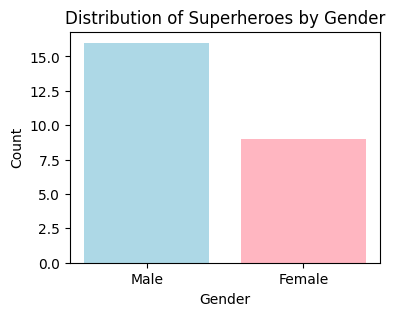

In [58]:
# Create a bar chart to visualize the distribution
plt.figure(figsize=(4, 3))
plt.bar(gender_counts.index, gender_counts.values, color=['lightblue', 'lightpink', 'lightgray'])
plt.title('Distribution of Superheroes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display the plot
plt.show()


**Analysing the distribution of superheroes based on their alignment**

In [59]:
# Calculate the count of superheroes by alignment
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of superheroes by gender
alignment_counts = df['alignment'].value_counts()

alignment_counts

Evil       13
Good        9
Unknown     3
Name: alignment, dtype: int64

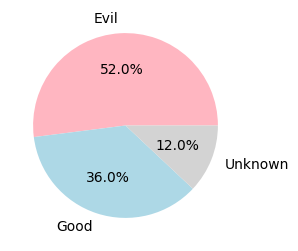

In [60]:
# Create a pie chart to visualize the distribution

plt.figure(figsize=(4, 3))


plt.pie(alignment_counts, labels=alignment_counts.index, labeldistance=1.15, autopct='%1.1f%%', colors=['lightpink', 'lightblue', 'lightgray'] )

# Display the plot
plt.show()



## **Exploring the  relationship between gender and alignment among superheroes.**

We examine whether there are any gender-based patterns in superhero alignment.

We look for trends, such as whether a particular gender is more commonly associated with being "Good" or "Evil."

### Superhero Alignment Distribution by Gender Analysis

In [68]:
import pandas as pd

# Group the data by gender and alignment
grouped_data = df.groupby(['gender', 'alignment'])

# Calculate the count for each group
gender_alignment_counts = grouped_data.size()

# Reshape the result to have gender as rows and alignment as columns
gender_alignment_counts = gender_alignment_counts.unstack()

# Replace any missing values with zeros
gender_alignment_counts = gender_alignment_counts.fillna(0)

# Display the resulting DataFrame
(gender_alignment_counts)

alignment,Evil,Good,Unknown
gender,,,
Female,4,4,1
Male,9,5,2


**Visualising the distribution of "Good" and "Evil" superheroes within each gender category**

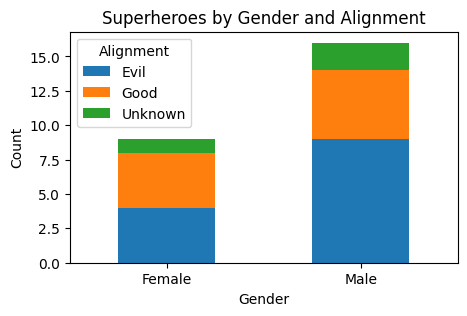

In [63]:
# Create a stacked bar chart
gender_alignment_counts.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('Superheroes by Gender and Alignment')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Alignment')

# Display the plot
plt.show()


**Grouped bar chart**

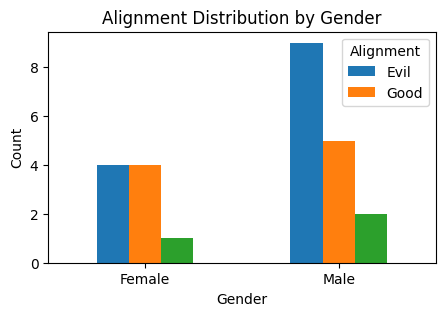

In [65]:
# Create a grouped bar chart to visualize the distribution
ax = gender_alignment_counts.plot(kind='bar', figsize=(5, 3))
plt.title('Alignment Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Alignment', loc='upper right', labels=['Evil', 'Good'])
plt.xticks(rotation=0)

# Display the plot
plt.show()


**Horizontal stacked bar**

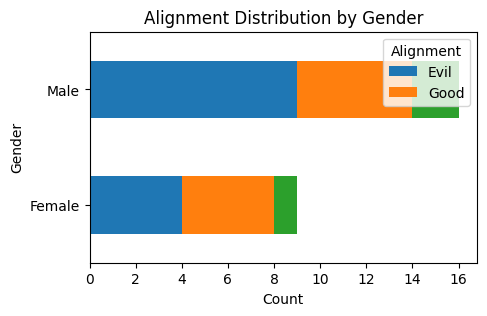

In [66]:
# Create a horizontal bar chart to visualize the distribution
ax = gender_alignment_counts.plot(kind='barh', stacked=True, figsize=(5, 3))
plt.title('Alignment Distribution by Gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.legend(title='Alignment', loc='upper right', labels=['Evil', 'Good'])

# Display the plot
plt.show()

## Activity: anlayse and Visualise
**Superhero Gender Distribution by Alignment Analysis**

In [ ]:
# Group the data by alignment and gender


In [ ]:
# Create a grouped bar chart to visualize the distribution


# Display the plot
